**BIF7010 | Bioinformatique des structures**

UQAM - Hiver 2019

Amine Remita


**Apprentissage automatique - Partie 2**


* Apprentissage supervisé

* Apprentissage non supervisé

* Évaluation de l'apprentissage



<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
BIF7101_S2 by Amine Remita is licensed under a Creative Commons Attribution-
ShareAlike 4.0 International License.


Quelques sous-sections et figures sont prises (avec autorisation) à partir des cours de Mohamed Bouguessa Ph.D. (DIC9370) et Ahmed Halioui Ph.D. (BIF7101)

## Apprentissage supervisé

* Entrée : base de données d'apprentissage, ensemble d'exemples
* Trouver une fonction (un modèle) $c : X -> Y$ qui approxime et généralise au mieux la relation entre les exemples $x_i$ et leurs catégories $y_i$

* But:
    * Modèle de prédiciton : classificaiton de nouvelle données
    * Schéma explicatif : aide à comprendre les relations qui existent entre les entrées et les sorties
    * Régression : approximation de fonction

![ml_supervised](figs/fig_ml_supervised.png)

In [1]:
## initialisation

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = np.array(iris.target)

# fusioner les deux classes versicolor et virginica
# pour avoir seulement deux classes

X = X[y!=2]
y = y[y!=2]

# On garde les deux premiers attributs 
X = X[:,0:2]

print("X shape : {}".format(X.shape))
print(y)

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

print(X_train.shape)

X shape : (100, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<Figure size 640x480 with 1 Axes>

(70, 2)


In [2]:
# Fonction pour ploter la bordure de decision

import numpy as np
import matplotlib.pyplot as pld
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


def plot_decision(data, targets, clf):
    h = .02  # step size in the mesh

    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))


    D_train, D_test, yd_train, yd_test = \
            train_test_split(data, targets, test_size=.4, random_state=42)

    cm = pld.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    clf.fit(D_train, yd_train)

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)

    pld.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    pld.scatter(D_train[:, 0], D_train[:, 1], c=yd_train, cmap=cm_bright,
            edgecolors='k')

    pld.scatter(D_test[:, 0], D_test[:, 1], c=yd_test, cmap=cm_bright,
            edgecolors='k', alpha=0.6)

    pld.xlim(xx.min(), xx.max())
    pld.ylim(yy.min(), yy.max())
    pld.xticks(())
    pld.yticks(())

    pld.tight_layout()
    pld.show()

### K plus proches voisins (KNN)

* Conserve les objets d'apprentissage pour les utiliser dans la classification des objets inconnus
* La classification se fait la recherche et la comparaison avec les $k$ objets proches
* la proximité est définie par une distance 
* Exemple : distance euclidienne:

Si $X_1 = (x_{11}, x_{12},..., x_{1n})$ et $X_2 = (x_{21}, x_{22},..., x_{2n})$

$dist(X_1, X_2) = \sqrt{\sum_{i=1}^{n}(x_{1i} - x_{2i})^2}$

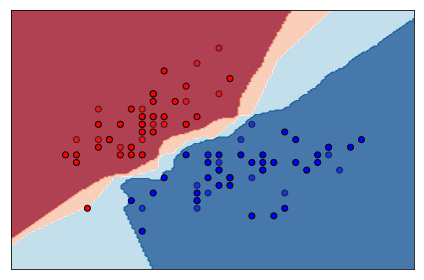

In [3]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

### Classification bayésienne naïve

* Calcule la probabilité d'appartenance d'un objet $X$ à une classe $y$

* Modèlise la distribution co-jointe $P(Y,\, X)$
    
    => **Modèle génératif**


* Se base sur le **théorème de Bayes** : 

$P(Y=benign|X) = \frac{P(Y=benign, \,X)}{P(X)} = \frac{P(X|Y=benign) \, P(Y=benign)}{P(X)}$

#### Algorithme de prédiction

* La classification d’un nouvel objet $X^{'}$ est effectuée par l'identification de la classe $Y^{'}$ qui maximise la probabilité *a posteriori* $P(Y^{'}|X^{'})$


* $Y^{'} = arg\,max_{y\in \{benign,\, malignant\}} \, P(Y=y|X^{'})$



#### Apprentissage

* Estimer les probabailités *a posteriori* $P(Y=benign|X)$ et $P(Y=malignant|X)$ par le théorème de Bayes
* Supposer que les attributs sont conditionnellement indépendants étant donnée une classe $y$


* $P(Y=benign|X) = P(X|Y=benign) \, P(Y=benign) \, /\, P(X)$


* $P(Y=benign|X) = \prod_i P(x_i|Y=benign) \, P(Y=benign) \, /\,\, P(X)$


* $P(Y=benign|X) \propto \prod_i P(x_i|Y=benign) \, P(Y=benign)$

#### Apprentissage

* $P(Y=benign)$ peut être estimée par Maximum de vraisemblance

* **Bayes naif gaussien**
    * $P(x_i|Y=benign) = \frac{1}{\sqrt{2\pi\sigma^2_{benign}}} \exp\left(-\frac{(x_i - \mu_{benign})^2}{2\sigma^2_{benign}}\right)$
    

* **Bayes naif multinomial**
    * $P(x_i|Y=benign) = \frac{ N_{benign} + \alpha}{N_y + \alpha n}$

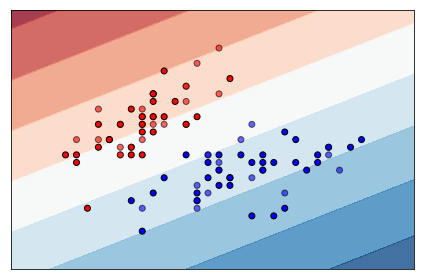

In [4]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Instanciation du classifieur
clf = MultinomialNB()

# Apprentissage/entrainement
clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

#plot_decision(X[:, 0:12], y ,clf)
plot_decision(X, y ,clf)

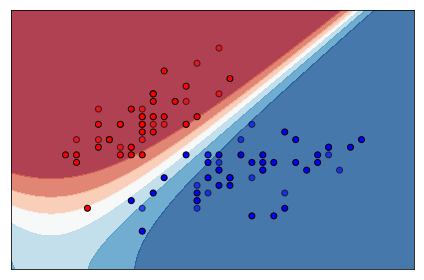

In [5]:
# Instanciation du classifieur
clf = GaussianNB()

# Apprentissage/entrainement
clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

#plot_decision(X[:, 0:12], y ,clf)
plot_decision(X, y ,clf)

### Régression logistique

* Calcule la probabilité d'appartenance d'un objet $X$ à une classe $y$

* Modèlise directement la probabilité  $P(Y|\,X)$
    
    => **Modèle discriminatif**

#### Algorithme de prédiction

* La classification d’un nouvel objet $X^{'}$ est effectuée par l'identification de la classe $Y^{'}$ qui maximise la probabilité *a posteriori* $P(Y^{'}|X^{'})$


* $Y^{'} = arg\,max_{y\in \{benign,\, malignant\}} \, P(Y=y|X^{'})$

#### Algorithme d'apprentissage 

$P(Y=benign|X) = \frac{1}{1 + exp(w_0 + \sum_{i=1}^{n}w_i X_i)}$

$P(Y=malignant|X) = \frac{exp(w_0 + \sum_{i=1}^{n}w_i X_i)}{1 + exp(w_0 + \sum_{i=1}^{n}w_i X_i)}$


* Estimation des poids **w** à partir des données d'apprentissage se fait par optimisation d'une fonction objective

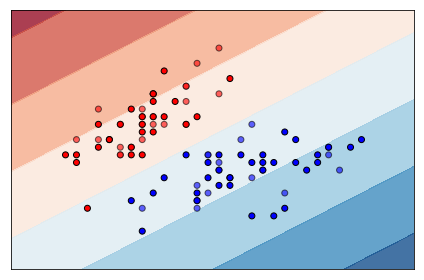

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=10000)

clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

### Séparateurs à vaste marge (SVM)

* SVM séparent les objets en deux classes par un hyperplan en utilisant des exemples essentiels appelés vecteurs de support
* SVM cherchent à trouver l’hyperplan qui minimise le risque empirique de classification (le nombre d’exemples de test mal classés)
* L’hyperplan avec une marge maximale minimise ce risque

![svm](figs/svm.png)

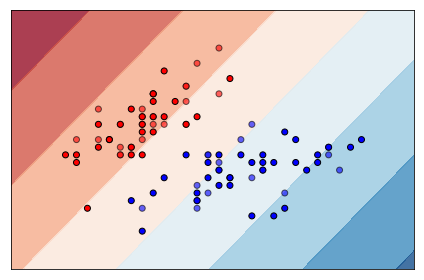

In [7]:
from sklearn.svm import SVC

# linéaire
clf = SVC(kernel="linear", C=0.025)

clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

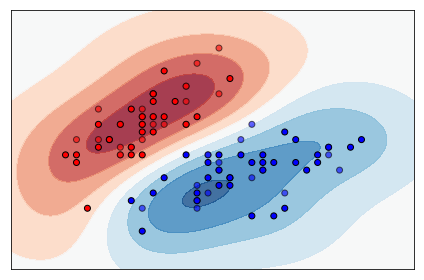

In [8]:
# Non linéaire
# Noyau Radial Basis Function
clf = SVC(kernel="rbf", gamma=2, C=1)


clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

### Arbres de décision


#### Algorithme d'apprentissage 
À partir des données d'apprentissage, identifier des règles de décision qui permettent la séparation des classes

#### Structure de l'arbre de décision
* Noeud interne correspond à un test sur un attribut
* Branche représente le résultats du test
* Feuille contient une classe (une classe peut correspondre à plusieurs feuilles)

<img src="figs/iris_tree.png" width="600" />

![build tree](figs/build_tree.png)

#### Classement des attributs

La probabilité qu'un objet de classe $C_i$ appartient à $X$ ($p_i$) est estimée par $|C_{i,D}|/|D|$

1. **Gain d'information** (utilisé par ID3)

$Gain(X, A) = Entropie(X) - \sum_{v\in valeur(A)}^{}\frac{|X_v|}{|X|} \times Entropie(X_v)$

$Entropie(X) = -\sum_{i=1}^{m} p_i log_2(p_i)$

2. **indice de Gini** (utilisé par CART)

$Gini(A) = \sum_{i=1}^{v}\frac{|X_v|}{|X|} \times Gini(X_v)$

$Gini(X_v) = 1-\sum_{i=1}^{m} p_i^2$

#### Algorithme de prédiction

La classification des objets se fait par une séquence de tests successifs de l'arbre

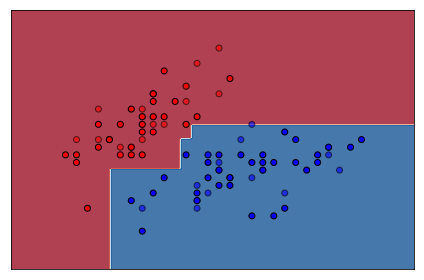

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=5)

clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

### Réseaux de neurones

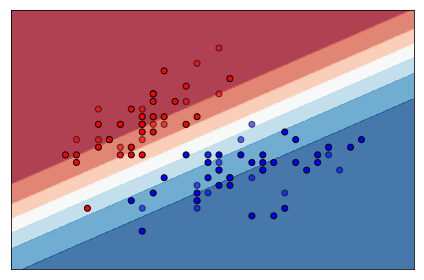

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=1, activation='relu', solver='sgd',\
                    max_iter=1500)

clf.fit(X_train, y_train)

# Prédiction 
y_pred = clf.predict(X_test)

plot_decision(X, y ,clf)

## Apprentissage non supervisé

### Clustering

Le but principal du clustering est la découverte automatique des structures similaires dans l’espace d’objets

![](figs/clusters1.png)

* Le processus du clustering vise à construire des groupes (clusters) d’objets similaires à partir d’un ensemble hétérogène d’objets

* Chaque cluster issu de ce processus doit vérifier les deux propriétés suivantes :
    * **Cohésion interne** : les objets appartenant à ce cluster soient les plus similaires possibles
    * **Isolation externe** : les objets appartenant aux autres clusters soient les plus distinctes possibles

* Le processus de clustering repose sur une mesure précise de la similarité des objets que l’on veut regrouper. Cette mesure est appelée distance ou métrique

### Stratégies

* Partitionnement (K-means)
* Clustering hiérarchique
* Clustering basé sur la densité (DBSCAN)

### Algorithme K-means

* L’algorithme partitionne l’ensemble des données à un certain nombre de clusters K (K est fourni par l’utilisateur)
* Chaque cluster est représenté par son centre
* On commence avec K clusters et on raffine les clusters itérativement
* K-means génère une partition Hard (chaque objet appartient à un seul cluster seulement)

#### Algorithme

1. Sélectionner aléatoirement un ensemble de K objets comme centres initiaux
2. Répéter :
    * Former K clusters et ce en assignant chaque point au centre le plus proche
    * Recalculer les centres de clusters
3. Jusqu’à stabilité de la partition (les centres ne changent pas)

![](figs/kmeans1.png)

#### Caractéristiques de K-means

* **Avantages**
    * Relativement efficace (rapide)
    * Converge souvent
* **Faiblesses**
    * Besoin de spécifier K
    * Ne gère pas le bruit
    * Sensibles à la sélection initiale des centres de clusters

![](figs/kmeans2.png)

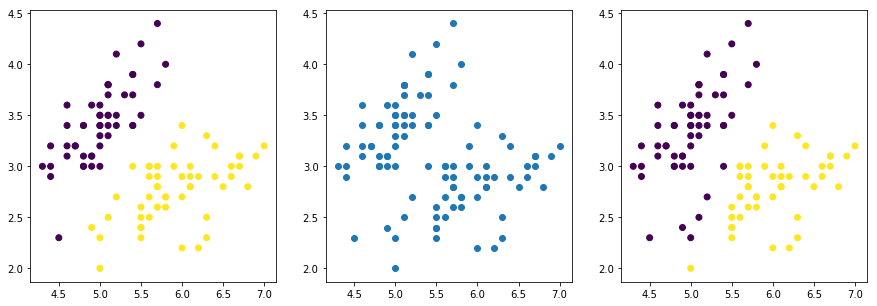

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
#print(kmeans.labels_)
#print(kmeans.cluster_centers_)

y_pred = kmeans.predict(X)

# Générer la figure
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X[:,0],X[:,1], c=y)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1])

plt.subplot(133)
plt.scatter(X[:,0],X[:,1], c=y_pred)

plt.show()

### Clustering hiérarchique

* Un algorithme de clustering hiérarchique ne produit pas une seule partition mais une hiérarchie de partition emboîtées
* Un cluster est défini comme un noeud d’arbre, auquel est associé l’ensemble des objets qui le composent
* Il existe deux catégories d’algorithmes hiérarchiques :
     * Méthodes **ascendantes** ou **agglomératives**
     * Méthodes **descendantes**

#### Méthodes ascendantes (agglomératives)

* La partition initiale contient autant de clusters que d’objets (K = n) 
* À chaque étape, on cherche un couple (Ci , Cj ) de clusters candidats à la fusion qui maximise une certaine mesure de similarité
* On réitère ce processus jusqu’à l’obtention d’un seul cluster contenant tous les éléments
* Afin de déterminer le nombre de clusters, on coupe la hiérarchie à un certain niveau


<img src="figs/clust2.png" width="500" />

#### Méthodes descendantes

* Commencer avec un cluster contenant touts objets
* Séparer les groupes en plus petits groupes jusqu’à ce que chauqe groupe ne contient qu’un seul objet
* Dans cette approche, on a besoin de décider quel le cluster qu’on doit le diviser, à quelle étape et comment faire la division

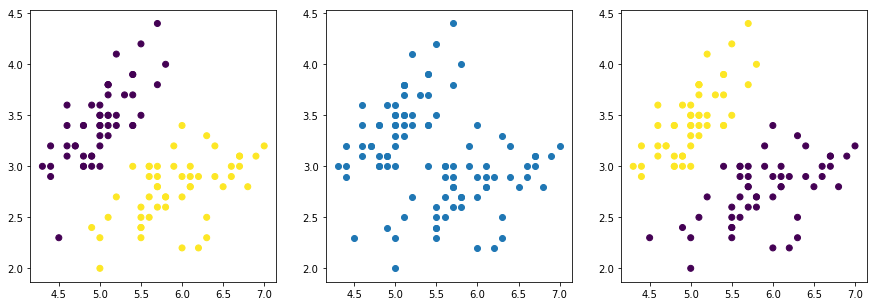

In [12]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering()

y_pred = clustering.fit_predict(X)
#print(clustering.labels_)

# Générer la figure
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X[:,0],X[:,1], c=y)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1])

plt.subplot(133)
plt.scatter(X[:,0],X[:,1], c=y_pred)

plt.show()

### Clustering basé sur la densité

* Les techniques de clustering vu précédemment ne permettent pas l’identification de clusters de forme : étirée, linéaire, allongée, etc.

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est capable d’identifier ce type de clusters


<img src="figs/clust3.png" width="500" />

* Un cluster est une région de grande densité entourée par des points avec une densité relativement faible
* Un bruit appartient à une région de très faible densité
* On dit un objet appartient à une région de forte densité si la cardinalité de son voisinage dépasse un certiain seuil

<img src="figs/clust4.png" width="350" />

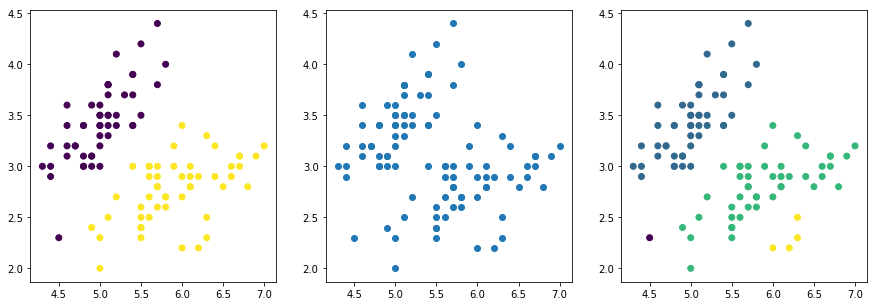

In [13]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.35, min_samples=3)
y_pred = clustering.fit_predict(X)
#print(y_pred)

# Générer la figure
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X[:,0],X[:,1], c=y)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1])

plt.subplot(133)
plt.scatter(X[:,0],X[:,1], c=y_pred)

plt.show()

## Évaluation de l’apprentissage

### Utilisation d’un échantillon de test

* La méthode la plus simple pour estimer la qualité d’un algorithme d’apprentissage est de diviser l’ensemble des exemples en deux ensembles indépendants : le premier, noté $A$, est utilisé pour l’apprentissage, le second, noté $T$, sert à mesurer sa qualité.
* $T$ est l’échantillon de test tel que : $S = A ∪ T$ et $A ∩ T = Φ$
* La mesure des erreurs commises par l’algorithme d’apprentissage sur l’ensemble de test T est une estimation de sa qualité

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### La validation croisée

* Diviser les données d’appentissage $S$ en k sous-échantillons de tailles égales
* Répeter
    * Retenir l’un de ces échantillons ($i$). 
    * Entrainer l’algorithme $C$ sur l’ensemble $S − i$
    * Mesurer le taux d’erreur $R_i(C)$ sur l’ensemble de test $i$
* Recommencer le processus décrit ci-dessus pour chaque échantillon $i$ 
* L’erreur estimée finale est donnée par la moyenne des erreurs mesurées

<img src="figs/cross_validation.png" width="500" />

In [15]:
from sklearn.model_selection import cross_validate
from sklearn import svm
from pprint import pprint

scoring = ['precision', 'recall', 'f1']

clf = svm.SVC(kernel='linear', C=1, random_state=0)

scores = cross_validate(clf, X, y, scoring=scoring, cv=5)

pprint(scores)

{'fit_time': array([0.00088191, 0.00048614, 0.000453  , 0.00100088, 0.00109887]),
 'score_time': array([0.00545216, 0.00190687, 0.00184798, 0.0037272 , 0.00272489]),
 'test_f1': array([1.        , 1.        , 1.        , 1.        , 0.95238095]),
 'test_precision': array([1.        , 1.        , 1.        , 1.        , 0.90909091]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'train_f1': array([1., 1., 1., 1., 1.]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'train_recall': array([1., 1., 1., 1., 1.])}


In [16]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.90909091, 1.        ])

### Leave-one-out

Lorsque les données disponibles sont très peu nombreuses, il est possible de pousser à l’extrême la méthode de validation croisée en prenant k le nombre total d’exemple diponible (k = n). Dans ce cas, on ne retient à chaque fois qu’un seul exemple pour le test, et on répète l’apprentissage k fois pour tous les autres exemples d’apprentissage.


<img src="figs/leave.png" width="300" />

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
clf = svm.SVC(kernel='linear', C=1)

scores = list()

for train, test in loo.split(X):
    # apprentissage
    clf.fit(X[train], y[train])
    # prédiction
    y_pred = clf.predict(X[test])
    # calcul score
    scores.append(accuracy_score(y[test], y_pred))

scores = np.array(scores)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


### Matrice de confusion

Mesurer la qualité de généralisation du classificateur

![](figs/matrice.png)

In [18]:
from sklearn.metrics import confusion_matrix

y_true = ["A", "A", "A", "B", "B", "B", "B"]
y_pred = ["A", "B", "A", "A", "B", "B", "B"]

confusion_matrix(y_true, y_pred)


array([[2, 1],
       [1, 3]])

### Calcul des mesures

$ Rappel = \frac{TP}{TP + FN} $
(par rapport aux instances réelles)

$ Précision  = \frac{TP}{TP + FP} $
(par rapport aux instances prédites)

$ F-mesure = \frac{2 (Precision \times Rappel)}{Precision + Rappel)} $

In [19]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import recall_score, precision_score, f1_score

y_true = [0, 0, 0, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1]

print("Rappel = {}".format(recall_score(y_true, y_pred)))
print("Précision = {}".format(precision_score(y_true, y_pred)))
print("F-measure = {}".format(f1_score(y_true, y_pred)))

Rappel = 0.75
Précision = 0.75
F-measure = 0.75


**True Positive Rate**
(ou sensibilité)

$ TPR = \frac{TP}{TP + FN} $
				

**True Negative Rate**
(ou Spécificité)

$ TNR = \frac{TN}{FP + TN} $
				

**False Positive Rate**
(ou 1-Spécificité)

$ FPR = \frac{FP}{FP + TN} $ 
				

**False Negative Rate**

$ FNR = \frac{FN}{TP + FN} $

### Courbe ROC

* ROC : Receiver Operating Characteristic
* Elle met en ralation dans un graphique les taux de faux positifs (en abscisse) et les taux de vraix postifs (en ordonnée)
* Elle est définie pour les problémes de deux classes


<img src="figs/courbe_roc.png" width="400" />

Quelques points importants dans la courbe :

* (FPR, TPR) :
* (0, 0) prédit toujours négatif
* (1, 1) prédit toujours positif
* (0, 1) classification idéale
* Ligne diagonale (ligne de hasard) : classification aléatoire

In [20]:
import numpy as np
from sklearn.metrics import roc_curve

# exemple de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#y = np.array([1, 1, 2, 2])
#scores = np.array([0.1, 0.4, 0.35, 0.8])
#fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)
#print(thresholds)


from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Instanciation du classifieur
clf = MultinomialNB()

# Apprentissage/entrainement
clf.fit(X_train, y_train)

# Prédiction 
scores = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, scores[:,0], pos_label=0)
print(fpr)
print(tpr)
print(thresholds)


[0. 0. 0. 0. 1.]
[0.         0.05882353 0.88235294 1.         1.        ]
[1.54028221 0.54028221 0.49020144 0.48763955 0.40847046]
